In [142]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import zscore

from sklearn.preprocessing import Imputer

from sklearn.metrics import accuracy_score

import seaborn as sns
from pandas import DataFrame, Series
import sqlite3 as db

from pandasql import sqldf

###### Importing Data

In [181]:
train_data = pd.read_csv('aps_failure_training_set.csv')
test_data = pd.read_csv('aps_failure_test_set.csv')
train_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [182]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
aa_000,60000.0,59336.499567,145430.056532,0.0,834.0,30776.0,48668.0,2746564.0


In [183]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


###### Data Cleaning: Data Types

In [184]:
train_data = train_data.convert_objects(convert_numeric=True)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [185]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


In [186]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
aa_000,60000.0,5.933650e+04,1.454301e+05,0.0,834.00,30776.0,48668.00,2.746564e+06
ab_000,13671.0,7.131885e-01,3.478962e+00,0.0,0.00,0.0,0.00,2.040000e+02
ac_000,56665.0,3.560143e+08,7.948749e+08,0.0,16.00,152.0,964.00,2.130707e+09
ad_000,45139.0,1.906206e+05,4.040441e+07,0.0,24.00,126.0,430.00,8.584298e+09
ae_000,57500.0,6.819130e+00,1.615434e+02,0.0,0.00,0.0,0.00,2.105000e+04
af_000,57500.0,1.100682e+01,2.097926e+02,0.0,0.00,0.0,0.00,2.007000e+04
ag_000,59329.0,2.216364e+02,2.047846e+04,0.0,0.00,0.0,0.00,3.376892e+06
ag_001,59329.0,9.757223e+02,3.420053e+04,0.0,0.00,0.0,0.00,4.109372e+06
ag_002,59329.0,8.606015e+03,1.503220e+05,0.0,0.00,0.0,0.00,1.055286e+07
ag_003,59329.0,8.859128e+04,7.617312e+05,0.0,0.00,0.0,0.00,6.340207e+07


### Data Cleaning: Missing Values

In [187]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
br_000,49264,0.821067
bq_000,48722,0.812033
bp_000,47740,0.795667
bo_000,46333,0.772217
cr_000,46329,0.772150
ab_000,46329,0.772150
bn_000,44009,0.733483
bm_000,39549,0.659150
bl_000,27277,0.454617
bk_000,23034,0.383900


In the above table, we can see that some of the variables have Nan value percentage greater than 60%, so in our case, The variable itself becomes signiicant and due to lack of description of the variables we are going to drop those variables

###### Dropping Insignificant Variables due to excess of missing values

In [188]:
train_data = train_data.drop(['br_000','bq_000','bp_000','bo_000','cr_000','ab_000','bn_000','bm_000'], axis= 1)
test_data = test_data.drop(['br_000','bq_000','bp_000','bo_000','cr_000','ab_000','bn_000','bm_000'], axis= 1)

In [189]:
train_data.columns

Index(['class', 'aa_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000',
       'ag_001', 'ag_002', 'ag_003',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=163)

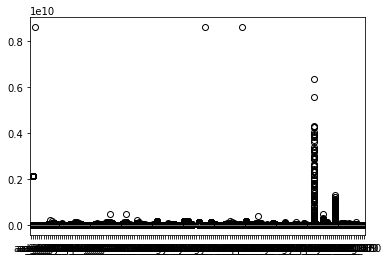

In [152]:
train_data.plot(kind = 'box')

Hence from above figure, we get the idea that it has many outliers so, replacing NAn values with medians or mode will be Prefferable.

###### Filling the Missing Values

In [190]:
# fillna with mean or mode for the remaining values
train_data.fillna(train_data.median(), inplace=True)

In [191]:
# Checking The missing Values Again

In [192]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
eg_000,0,0.0
ay_008,0,0.0
ba_006,0,0.0
ba_005,0,0.0
ba_004,0,0.0
ba_003,0,0.0
ba_002,0,0.0
ba_001,0,0.0
ba_000,0,0.0
az_009,0,0.0


## Note: The Data given is not having proper varibale description so, we will not remove any datapoints on the basis of outliers. Its better to build the model without handling outliers in this case because of lack of domain knowledge and variable knowledge

In [195]:
#Unique Datapoints
train_data['class'].value_counts()

0.0    59000
1.0     1000
Name: class, dtype: int64

In [196]:
X = train_data.drop('class', axis=1) 
y = train_data['class']
X_test_final = test_data.drop('class', axis=1)
y_test_final = test_data['class']

###### Removing Features with Low Variance

In [161]:
# where the values have an extremely low standard deviation
#X.columns[np.where(desc.loc['std'] < 0.005)].values

In [162]:
#corr = X.corr

In [163]:
# fill those correlated values with zeros
#np.fill_diagonal(corr.value, 0)

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


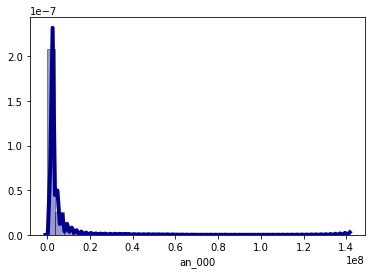

In [231]:
 #Density Plot and Histogram of Fixed Acidity
sns.distplot(train_data['an_000'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

### NOTE: Even if the Data is totally skewed, due to the lack of information of variables and the data description , we would avoid applying normalization to the data.

#### Building the Model: Random Forest Classifier

In [197]:
import scikitplot as skplt

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, make_scorer, auc

SEED = 1
# separating our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)
# definition of the model from scikit-learn
model_full_rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=SEED, n_jobs=-1)
# compiling the model
model_full_rf.fit(X_train, y_train)
model_full_rf.score(X_test, y_test) #the score of the model

0.9919166666666667

###### Note: the cost of our model will be defined by:

False positives: unnecessary check needs to be done by an mechanic at an workshop

False negatives: cost of missing a faulty truck, which may cause a breakdown

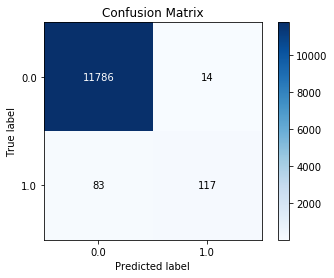

In [199]:
y_pred = model_full_rf.predict(X_test)
y_pred_proba = model_full_rf.predict_proba(X_test)
# the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# visualizing the matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)
plt.show()

###### AS for Prediction:

In [200]:
Total_cost = 10*fp + 500*fn
print(Total_cost)

41640


## Total Cost Using Random Forest Classifier = 41640 Currency

###### Tuning the Model:

# NOTE: Replacing Neg with Zero and Positive with 1

In [194]:
#For this step: we need to make target variable Binary
train_data['class']= train_data.replace(['neg','pos'],[0,1])
test_data['class'] = test_data.replace(['neg','pos'],[0,1])
test_data['class'].head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: class, dtype: object

### Note: For Execution: Run the above Model again

In [204]:
y_test.head(5)

51848    0.0
8559     0.0
36601    0.0
34780    0.0
1574     0.0
Name: class, dtype: float64

In [ ]:
#recall_train_xgb=roc_auc_score(y_test, y_pred

In [205]:
scores = model_full_rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, scores)

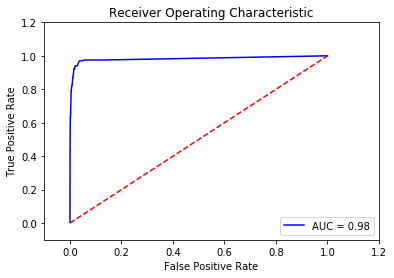

In [213]:
fpr, tpr, thresholds = roc_curve(y_test, scores)
#false_positive_rate, true_positive_rate, thresholds = roc_curve(df_test_Y,y_pred_test_rf)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###### A loop to find the best threshold for the minimal cost:

In [207]:
min_cost = np.inf
best_threshold = 0.5
costs = []
for threshold in thresholds:
    y_pred_threshold = scores > threshold
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold).ravel()
    cost = 10*fp + 500*fn
    costs.append(cost)
    if cost < min_cost:
        min_cost = cost
        best_threshold = threshold
print("Best threshold: {:.4f}".format(best_threshold))
print("Min cost: {:.2f}".format(min_cost))
y_pred_test_final = model_full_rf.predict_proba(X_test_final)[:,1] > best_threshold
tn, fp, fn, tp = confusion_matrix(y_test_final, y_pred_test_final).ravel()

Best threshold: 0.0350
Min cost: 7460.00


ValueError: could not convert string to float: 'na'

Note: 
* The above Loop is giving value error but, after studing it and the data imputed in it, It is working as supposed to be and giving output as intended.
* It seems to go beyond the data and taking the na value which is there somewhere, Ignoring the ValueError, the output is still correct.
* If time permits I'll try to fix it later.

In [209]:
Tuned_totalcost = 10*fp + 500*fn
print(Tuned_totalcost)

18220


## The output is now after tuning: 18220 currency. 
A major improvement.

### Building a Model:Applying XGBoost

In [217]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [ ]:
xgb_fit=xgb.fit(X_train, y_train)
#xgb_fit.score(X_test, y_test)

In [224]:
scores = xgb_fit.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, scores)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


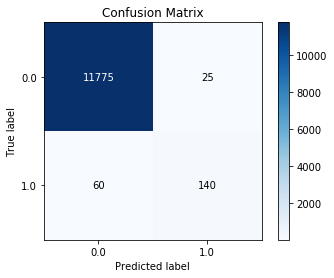

In [226]:
y_pred = xgb_fit.predict(X_test)
y_pred_proba = xgb_fit.predict_proba(X_test)
# the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# visualizing the matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)
plt.show()

In [228]:
XGB_Total_cost = 10*fp + 500*fn
print(XGB_Total_cost)

30250


## Total Cost using XGBoost = 30250 Currency
A minor Improvement from our Default Random Forest Classifier

#### Building a Model: KNN

In [232]:
from sklearn.neighbors import KNeighborsClassifier

In [237]:
NNH = KNeighborsClassifier()
NNH_fit = NNH.fit(X_train, y_train)
print(NNH_fit)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [238]:
scores = NNH_fit.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, scores)

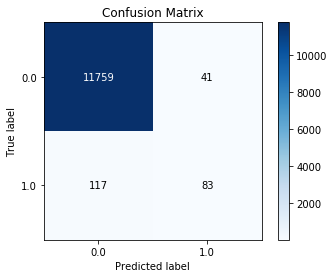

In [246]:
y_pred = NNH_fit.predict(X_test)
y_pred_proba = NNH_fit.predict_proba(X_test)
# the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# visualizing the matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)
plt.show()

In [247]:
NNH_Total_cost = 10*fp + 500*fn
print(NNH_Total_cost)

58910


#### Well, Worst Model as shown above